# D214 - Data Analytics Graduate Capstone Performance Assessment Task 2

Assignment Completed by Favio Conde and Submitted August 24, 2023 for WGU - MSDA
</br>

### Table of Contents

#### Part I: Research Question
<ul>
    <li><a href='#a'>A: Research Question</a></li>
</ul>
 
#### Part II: Data Collection
<ul>
    <li><a href='#b'>B. Data Collection</a></li>
</ul> 

#### Part III: Data Extraction and Preparation
<ul>
    <li><a href='#c'>C: Data Extraction  and Preparation</a></li>
</ul>

#### Part IV: Analysis
<ul>
    <li><a href='#d'>D: Analysis</a></li>
</ul>

#### Part V: Data Summary and Implications
<ul>
    <li><a href='#e'>E: Summary and Implications</a></li>
    <li><a href='#f'>F. Sources</a></li>
</ul>

### PART A: RESEARCH QUESTION<a id='a'></a>

To what extent do Client_income, House_Own, Credit_Amount, Loan_Annuity, Client_Education, Client_Marital_Status, Loan_Contract_Type, Score_Source_1, Score_Source_2, and Score_Source_3 predict loan defaults?

H<sub>0</sub>: The selected features in the data can significantly predict loan defaults in the data set.</br>
H<sub>a</sub>: The selected features in the data cannot significantly predict loan defaults in the data set.

Financial institutions extend credit to the customer. In the current market, where rates are rising, and liquidity has increasingly become a concern, lenders are more selective to whom they extend credit. Lenders should diversify their loan portfolio to include high-grade (A- and B-paper) and lower-grade paper. The lower-grade paper presents a higher risk and an opportunity for a higher yield. If the lender can better determine creditworthiness once they navigate into applications in the lower credit score range, this could benefit the lender. By mitigating risk on the front end, the lender can hedge against losses, resulting in more cash available to lend, which means that lenders don't have to borrow money to lend money, which also means savings for customers through lower interest rates.

### PART B: DATA COLLECTION<a id='b'></a>

I downloaded the data set I used for the logistic regression analysis from <i>Kaggle</i>.  The data from Kaggle consists of information from NBFI, a non-bank financial company.  Meastanmay defines NBFI as a financial institution that doesn't have the authorization to operate as a bank and is not supervised by banking regulatory agencies like FDIC or NCUA.

The data set has a lot of information for borrowers with auto loans, including borrowers who have defaulted and who are paying as agreed.  The current economic environment consists of rising gas prices, increasing fed rates, causing lenders to raise rates and mass layoffs.  Disposable income is decreasing for some, which makes it more difficult to pay on loans.  Many laid-off borrowers have to surrender their vehicle if they can't afford the payment, which increases the difficulty of finding employment if they must commute to work. A critical calculation to consider while developing a loan default prediction model is payment-to-income (PTI).  PTI was not in the data, but `Loan_annuity` and `Client_income` were, so I will use this information to add a column in the data set and use that as one of my independent variables in the analysis.

Most lenders use the borrowers' FICO as a tool to determine creditworthiness.  The data set has three different credit scores, but the author needed to provide background information to understand the type of scores.  They could be standard FICO scores, auto-enhanced FICO scores, or LexisNexis scores.  Unfortunately, the author provided no clarification.

A benefit of the data set is that it is a CSV file, which makes it convenient to import and analyze using Python.  However, the provided data set was already split into train and test sets.  The test set did not have the `Default` column that I could use to validate the model.  As a result, I will be using only the train data set and splitting that into train and test sets.  The train set has 121,857 records with several null values dispersed in the data.

### PART C: DATA EXTRACTION AND PREPARATION<a id='c'></a>

I order to analyze the data, I started off by importing the CSV file into my Jupyter Notebook.  I imported the following libraries and packages:
<ul>
    <li>NumPy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Statsmodels</li>
    <li>Sklearn</li>
</ul>

I had identified certain independent variables I wanted to use in the analysis, so I dropped the features that I had not selected from the data frame.

I kept the following categorical independent variables:

<ul>
    <li>Car_Owned</li>
    <li>Active_Loan</li>
    <li>House_Own</li>
    <li>Client_Education</li>
    <li>Client_Marital_Status</li>
    <li>Client_Gender</li>
</ul>

For the numerica independent variables, I kept:

<ul>
    <li>Client_Income</li>
    <li>Credit_Amount</li>
    <li>Loan_Annuity</li>
    <li>Age_Days</li>
    <li>Credit_Bureau</li>
</ul>

I removed `$` from the columns and replaced them with `NAN`, since the fields with a `$` had no data.  Next, I checked for null values.  There were many null values, so I checked the categorical variable distribution to determine if I could impute null values.

I filled null values in  `Client_Education` with `Secondary`, `Client_Marital_Status` with `M`, `Client_Gender` with `Other`, and `Age_Days` and `Credit_Bureau` with the column medians.

I converted all categorical variables to `category` data type and changed numeric values to either `float` or `int`.

I inspected the data set dimensions using `.shape`, and I checked for null values again.  In the next step, I dropped any remaining null values and confirmed they were all dropped by checking for null values again using `.isnull().sum()`.

I wanted to add `Payment_to_Income` to my data, so I divided `Loan_Annuity` by `Client_Income` and added the result.  I then created `num_var` to gather all numeric variables and `cat_var` to gather all categorical variables.

In the EDA process, I plotted a box plot to check for outliers since logistic regression is sensitive to outliers.  I dropped `Client_Income`, `Credit_Amount`, `Loan_Annuity`, and `Credit_Bureau` based on extreme outliers.  `Payment_to_Income` also had a lot of outliers, but I dropped anything above a PTI of 40%.  I used `.describe()` on the remaining numeric variables, `Age_Days` and `Payment_to_Income`, and rechecked the box plots.  I plotted each numeric variable along with `Default` for the bivariate analysis.

To inspect the categorical variables, I used `.describe()` on the variables.  `Car_Owned`, `Active_Loan`, and `House_Own` were changed from `0.0`/`1.0` to `0`/`1`.  I used one hot encoding on `Client_Education`, `Client_Marital_Status`, and `Client_Gender`, dropping the first column in each encoding.

After these steps, I had my prepared data and exported it as a CSV file.

Before any cleaning, only 8.08% of customers had defaulted on loans, so any cleaning that removed rows where the default was yes decreased this further.

For the analysis I used the following libraries:

<ul>
    <li>NumPy: used to perform a number of mathematical operations on arrays</li>
    <li>Pandas: used for importing data sets into data frames and allows data cleaning, exploration and manipulation of data sets</li>
    <li>Matplotlib: used to make visualizations</li>
    <li>Seaborn: used to make visualizations</li>
    <li>Sklearn: used for statistical and machine learning modelling</li>
    <ul>
        <li>Sklearn.linear_model: used to analyze logistic and linear regression models</li>
        <li>Sklearn.metrics: used to calculate the confusion matrix</li>
    </ul>
    <li>Statsmodels.stats.outliers_influces: used to calculate VIF to reduce features for multicollinearity</li>
</ul>

I imputed as many null values as I could.  The data cannot have any null values for the model to work correctly, so an advantage of assigning the null values is that `.median()`, or other methods can easily be used.  With a single line of code, `df['Credit_Bureau'] = df['Credit_Bureau'].fillna(df['Credit_Bureau'].median())`, for example, I was able to fill in all missing `Credit_Bureau` values with the column median.  However, the ease of imputation using this method is also a disadvantage.  There may be a scenario where using the median is inappropriate and could negatively alter the data distribution, affecting the analysis results.  Another disadvantage is that I wasn't able to apply an imputing method using `.mode()`.  There's a different method to do so, but I relied on the `.value_counts()` to determine the feature mode.

In [1]:
#importing libraries and packages
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#importing CSV files
df = pd.read_csv('Files/Train_Dataset.csv', low_memory=False, na_values=np.nan)

#setting up list of independent variables I will keep for analysis
var = ['Client_Income', 'Car_Owned', 'Active_Loan', 'House_Own', 'Credit_Amount', 'Loan_Annuity', 'Client_Education', 
       'Client_Marital_Status', 'Client_Gender', 'Age_Days', 'Credit_Bureau', 'Default']

#updating df to keep selected independent variables and the target variable
df = df[var]
df.head()

,Client_Income,Car_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Education,Client_Marital_Status,Client_Gender,Age_Days,Credit_Bureau,Default
0,6750,0.0,1.0,0.0,61190.55,3416.85,Secondary,M,Male,13957,NaN,0
1,20250,1.0,1.0,NaN,15282,1826.55,Graduation,M,Male,14162,NaN,0
2,18000,0.0,1.0,0.0,59527.35,2788.2,Graduation dropout,W,Male,16790,0.0,0
3,15750,0.0,1.0,1.0,53870.4,2295.45,Secondary,M,Male,23195,3.0,0
4,33750,1.0,1.0,0.0,133988.4,3547.35,Secondary,M,Female,11366,1.0,0


In [3]:
#removing '$' and replacing with NAN
clean_up = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Age_Days', 'Credit_Bureau']

for i in clean_up:
    df[i].replace('$', np.nan, inplace=True)
    
#checking for null values
df.isnull().sum()

Client_Income             3622
Car_Owned                 3581
Active_Loan               3635
House_Own                 3661
Credit_Amount             3637
Loan_Annuity              4813
Client_Education          3645
Client_Marital_Status     3473
Client_Gender             2413
Age_Days                  3600
Credit_Bureau            18540
Default                      0
dtype: int64

In [4]:
#checking distribution
check = ['Car_Owned', 'Active_Loan', 'House_Own', 'Client_Education', 'Client_Marital_Status', 'Client_Gender']
count = 0

for i in check:
    print(f'{i}')
    print(df[i].value_counts(normalize=True)*100)
    print('-'*45)
    count += 1

Car_Owned
0.0    65.714648
1.0    34.285352
Name: Car_Owned, dtype: float64
---------------------------------------------
Active_Loan
0.0    50.082473
1.0    49.917527
Name: Active_Loan, dtype: float64
---------------------------------------------
House_Own
1.0    69.205973
0.0    30.794027
Name: House_Own, dtype: float64
---------------------------------------------
Client_Education
Secondary             70.984088
Graduation            24.379288
Graduation dropout     3.349942
Junior secondary       1.230850
Post Grad              0.055832
Name: Client_Education, dtype: float64
---------------------------------------------
Client_Marital_Status
M    73.785087
S    14.701435
D     6.382673
W     5.130804
Name: Client_Marital_Status, dtype: float64
---------------------------------------------
Client_Gender
Male      65.690748
Female    34.306740
XNA        0.002512
Name: Client_Gender, dtype: float64
---------------------------------------------


In [5]:
#converting values to numeric to impute null values
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Credit_Bureau'] = pd.to_numeric(df['Credit_Bureau'], errors='coerce')

#imputing null values
df['Client_Education'] = df['Client_Education'].fillna('Secondary')
df['Client_Marital_Status'] = df['Client_Marital_Status'].fillna('M')
df['Client_Gender'] = df['Client_Gender'].fillna('Other')
df['Age_Days'] = df['Age_Days'].fillna(df['Age_Days'].median())
df['Credit_Bureau'] = df['Credit_Bureau'].fillna(df['Credit_Bureau'].median())

In [6]:
#converting variables to category
to_cat = ['Car_Owned', 'Active_Loan', 'House_Own', 'Client_Education', 
                'Client_Marital_Status', 'Client_Gender', 'Default']

for i in to_cat:
    df[i] = df[i].astype('category')
    
#converting variables to int
to_int = ['Age_Days', 'Credit_Bureau']

for i in to_int:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].astype(int)
    
#converting variables to float
to_float = ['Client_Income', 'Credit_Amount', 'Loan_Annuity']

for i in to_float:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].astype(float)

In [7]:
#checking data
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns')
print('-'*100)
df.info()

The data set has 121856 rows and 12 columns
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Client_Income          118234 non-null  float64 
 1   Car_Owned              118275 non-null  category
 2   Active_Loan            118221 non-null  category
 3   House_Own              118195 non-null  category
 4   Credit_Amount          118219 non-null  float64 
 5   Loan_Annuity           117030 non-null  float64 
 6   Client_Education       121856 non-null  category
 7   Client_Marital_Status  121856 non-null  category
 8   Client_Gender          121856 non-null  category
 9   Age_Days               121856 non-null  int32   
 10  Credit_Bureau          121856 non-null  int32   
 11  Default                121856 non-nul

In [8]:
#checking null values
df.isnull().sum()

Client_Income            3622
Car_Owned                3581
Active_Loan              3635
House_Own                3661
Credit_Amount            3637
Loan_Annuity             4826
Client_Education            0
Client_Marital_Status       0
Client_Gender               0
Age_Days                    0
Credit_Bureau               0
Default                     0
dtype: int64

In [9]:
#dropping null values
df = df.dropna()

#confirming null values dropped
df.isnull().sum()

Client_Income            0
Car_Owned                0
Active_Loan              0
House_Own                0
Credit_Amount            0
Loan_Annuity             0
Client_Education         0
Client_Marital_Status    0
Client_Gender            0
Age_Days                 0
Credit_Bureau            0
Default                  0
dtype: int64

In [10]:
#addign PTI to df
df['Payment_to_Income'] = (df['Loan_Annuity'] / (df['Client_Income']))*100

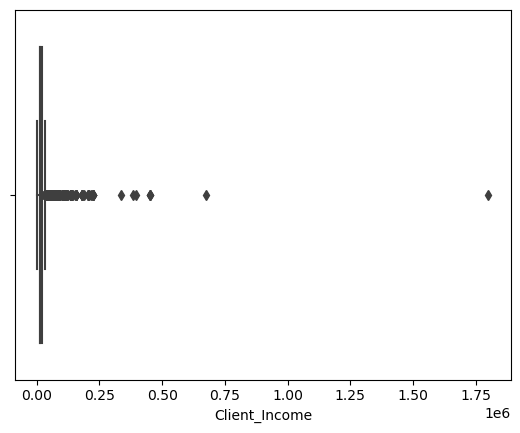

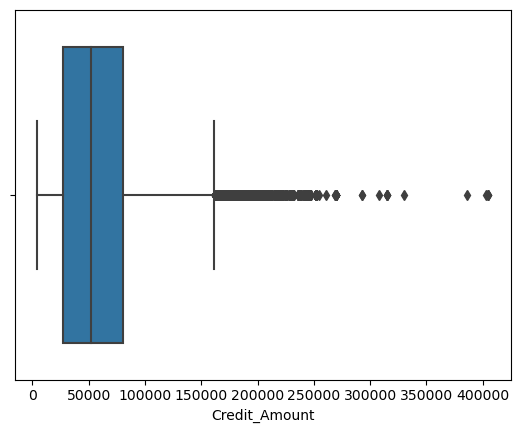

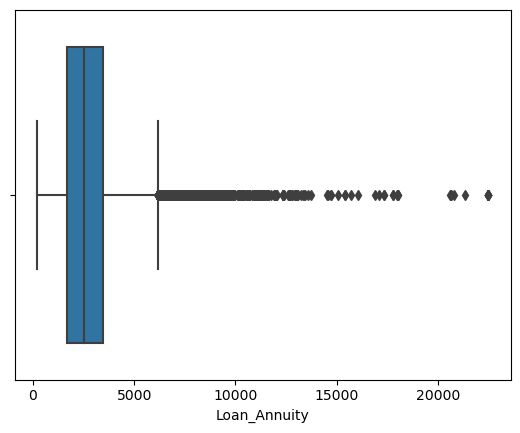

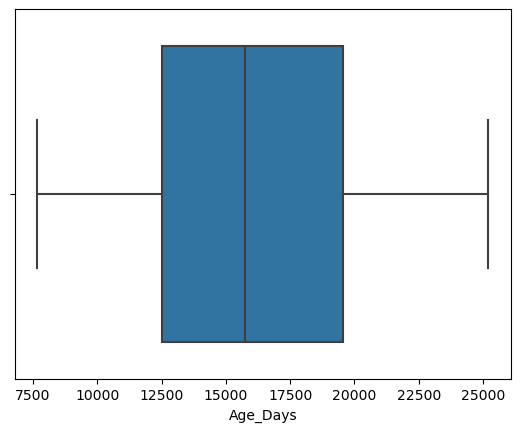

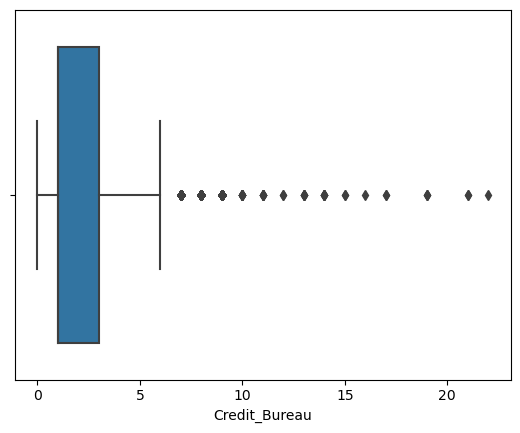

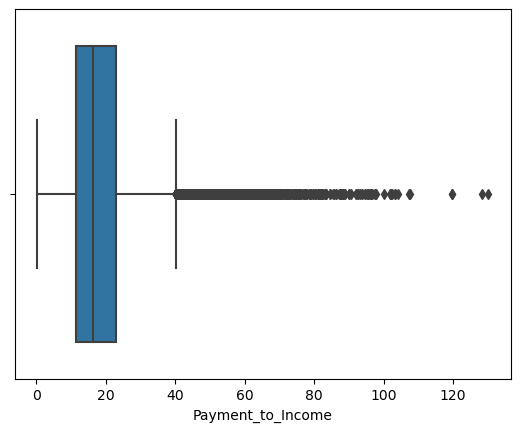

In [11]:
#creating variables for numeric and categorical variables for EDA, removing target variable
num_var = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Age_Days', 'Credit_Bureau', 'Payment_to_Income']
cat_var = ['Car_Owned', 'Active_Loan', 'House_Own', 'Client_Education', 'Client_Marital_Status', 'Client_Gender']

#creating num_var graphs
for col in num_var:
    sns.boxplot(data=df, x=col)
    plt.show()

In [12]:
#since logistic regression is sensitive to outliers, dropping all num_var except for Age_Days, and and Payemtn_to_Income
num_drop = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Credit_Bureau']
df.drop(num_drop, axis=1, inplace=True)

In [13]:
#removing PTI > 40
df = df[df['Payment_to_Income'] <= 40]

#resetting index after dropping rows
df = df.reset_index(drop=True)

In [14]:
#statistical information of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_Days,98004.0,15994.379699,4301.244039,7676.000000,12491.750,15734.00,19497.000000,25201.0
Payment_to_Income,98004.0,17.323226,7.912790,0.384973,11.336,16.12,22.322222,40.0


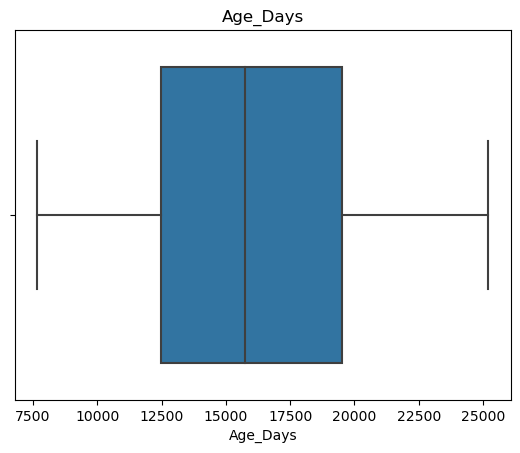

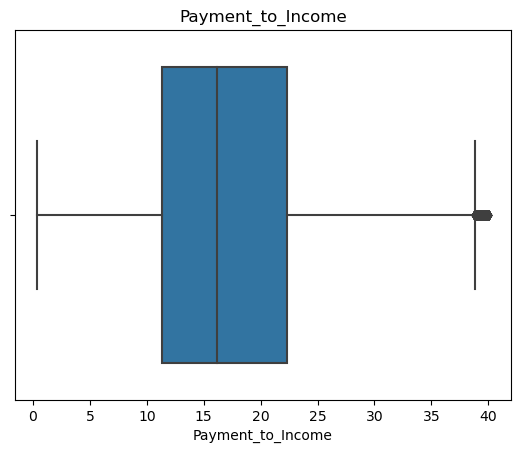

In [15]:
#checking updated box plots
num_var = ['Age_Days', 'Payment_to_Income']

#creating num_var graphs
for col in num_var:
    plt.title(col)
    sns.boxplot(data=df, x=col)
    plt.show()

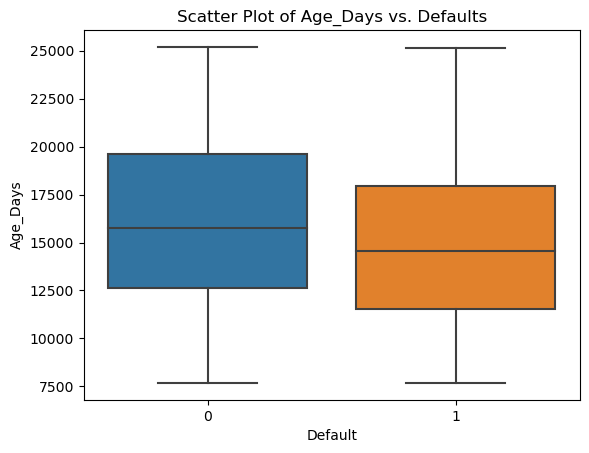

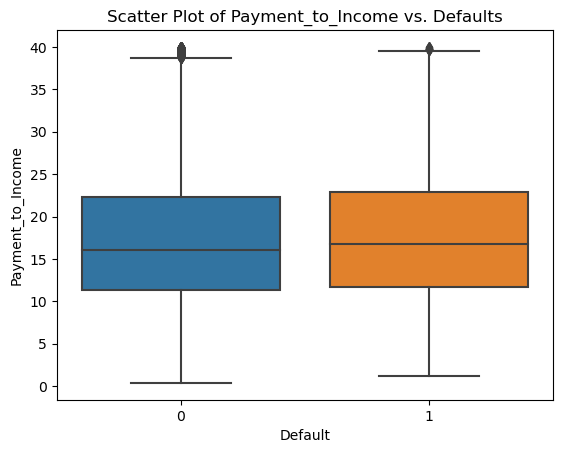

In [16]:
#creating bivariate plots for numeric variables
for col in num_var:
    plt.title(f'Scatter Plot of {col} vs. Defaults')
    sns.boxplot(data=df, x='Default', y=col)
    plt.show()

In [17]:
#statistical information of categorical variables
df[cat_var].describe().T

,count,unique,top,freq
Car_Owned,98004.0,2.0,0.0,64243.0
Active_Loan,98004.0,2.0,0.0,49105.0
House_Own,98004.0,2.0,1.0,67911.0
Client_Education,98004,5,Secondary,70219
Client_Marital_Status,98004,4,M,72514
Client_Gender,98004,4,Male,62689


In [18]:
#re-expressing 0.0/1.0 to 0/1
re_cat = ['Car_Owned', 'Active_Loan', 'House_Own']

for item in re_cat:
    df[item] = df[item].map({0.0: 0, 1.0: 1})

In [19]:
#checking statistics again
count = 0

for i in cat_var:
    print(f'{i}')
    print(df[i].value_counts(normalize=True)*100)
    print('-'*45)
    count += 1

Car_Owned
0    65.551406
1    34.448594
Name: Car_Owned, dtype: float64
---------------------------------------------
Active_Loan
0    50.105098
1    49.894902
Name: Active_Loan, dtype: float64
---------------------------------------------
House_Own
1    69.29411
0    30.70589
Name: House_Own, dtype: float64
---------------------------------------------
Client_Education
Secondary             71.649116
Graduation            23.818416
Graduation dropout     3.293743
Junior secondary       1.182605
Post Grad              0.056120
Name: Client_Education, dtype: float64
---------------------------------------------
Client_Marital_Status
M    73.990858
S    14.619811
D     6.320150
W     5.069181
Name: Client_Marital_Status, dtype: float64
---------------------------------------------
Client_Gender
Male      63.965756
Female    34.046570
Other      1.984613
XNA        0.003061
Name: Client_Gender, dtype: float64
---------------------------------------------


In [20]:
#re-expressing Client_Education, Client_Marital_Status and Client_Gender
ohe1 = pd.get_dummies(df['Client_Education'], drop_first=True)

# Adding new columns to main df
for item in ohe1.columns:
    df[item] = ohe1[item]

# Deleting the 'Gender' column since I have used one-hot encoding
del df['Client_Education']

In [21]:
#re-expressing Client_Education, Client_Marital_Status and Client_Gender
ohe2 = pd.get_dummies(df['Client_Marital_Status'], drop_first=True)

# Adding new columns to main df
for item in ohe2.columns:
    df[item] = ohe2[item]

# Deleting the 'Gender' column since I have used one-hot encoding
del df['Client_Marital_Status']

In [22]:
#re-expressing Client_Education, Client_Marital_Status and Client_Gender
ohe3 = pd.get_dummies(df['Client_Gender'], drop_first=True)

# Adding new columns to main df
for item in ohe3.columns:
    df[item] = ohe3[item]

# Deleting the 'Gender' column since I have used one-hot encoding
del df['Client_Gender']

In [23]:
#checking statistics for ohe variables
for item in ohe1.columns:
    print(f'{item} Counts')
    print(df[item].value_counts())
    print('-'*100)

for item in ohe2.columns:
    print(f'{item} Counts')
    print(df[item].value_counts())
    print('-'*100)

for item in ohe3.columns:
    print(f'{item} Counts')
    print(df[item].value_counts())
    print('-'*100)

Graduation dropout Counts
0    94776
1     3228
Name: Graduation dropout, dtype: int64
----------------------------------------------------------------------------------------------------
Junior secondary Counts
0    96845
1     1159
Name: Junior secondary, dtype: int64
----------------------------------------------------------------------------------------------------
Post Grad Counts
0    97949
1       55
Name: Post Grad, dtype: int64
----------------------------------------------------------------------------------------------------
Secondary Counts
1    70219
0    27785
Name: Secondary, dtype: int64
----------------------------------------------------------------------------------------------------
M Counts
1    72514
0    25490
Name: M, dtype: int64
----------------------------------------------------------------------------------------------------
S Counts
0    83676
1    14328
Name: S, dtype: int64
---------------------------------------------------------------------------------

In [24]:
#extracting prepared data set to CSV file
df.to_csv(r'Files/prepared_dataset.csv')

In [25]:
#defining x as all independent variables, and y as the dependent variable
x = df.drop('Default', axis=1)
y = df['Default']

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

         Current function value: 0.272723
         Iterations: 35


C:\Users\Favio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97988
Method:                           MLE   Df Model:                           15
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.02687
Time:                        22:41:44   Log-Likelihood:                -26728.
converged:                      False   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                6.598e-306
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6521      0.079    -20.824      0.000      -1.808      -1.497
Car_Owned             -0.3345      0.027    -12.198      0.000      -0.388      -0.281
Active_Loan            0.0223      0.024      0.941      0.347      -0.024       0.069
House_Own              0.0692      0.026      2.685      0.007       0.019       0.120
Age_Days           -7.169e-05   3.05e-06    -23.468      0.000   -7.77e-05   -6.57e-05
Payment_to_Income      0.0097      0.002      6.469      0.000       0.007       0.013
Graduation dropout     0.3402      0.071      4.804      0.000       0.201       0.479
Junior secondary       0.8055      0.103      7.833      0.000       0.604       1.007
Post Grad             -0.9305      1.011     -0.920      0.357      -2.912       1.051
Secondary              0.6585      0.033     19.831      0.000       0.593       0.724
M                     -0.0752      0.051     -1.487      0.137      -0.174       0.024
S                      0.0365      0.057      0.643      0.520      -0.075       0.148
W                      0.0677      0.077      0.884      0.377      -0.082       0.218
Male                  -0.4298      0.026    -16.351      0.000      -0.481      -0.378
Other                 -0.2951      0.087     -3.382      0.001      -0.466      -0.124
XNA                  -15.1030   2798.513     -0.005      0.996   -5500.087    5469.881
======================================================================================
"""

In [26]:
#checking model accuracy
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100,
                  multi_class='warn', n_jobs=None, penalty='l2',
                  random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x)
model.predict(x)
model.score(x, y)

0.9193910452634586

In [27]:
#using VIF to test for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data.sort_values('VIF', axis=0, ascending=False, inplace=True)

print(vif_data)

               Feature        VIF
3             Age_Days  11.819901
9                    M   8.457601
4    Payment_to_Income   5.626853
8            Secondary   3.953179
2            House_Own   3.237270
12                Male   3.220673
10                   S   2.224053
1          Active_Loan   1.948464
11                   W   1.705692
0            Car_Owned   1.687906
5   Graduation dropout   1.120574
13               Other   1.061012
6     Junior secondary   1.054731
7            Post Grad   1.002422
14                 XNA   1.000237


In [28]:
#dropping Age_Days since VIF > 10

x.pop('Age_Days')

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data.sort_values('VIF', axis=0, ascending=False, inplace=True)

print(vif_data)

               Feature       VIF
8                    M  6.950152
3    Payment_to_Income  5.328566
7            Secondary  3.671139
2            House_Own  3.053150
11                Male  3.008698
9                    S  1.996989
1          Active_Loan  1.925240
0            Car_Owned  1.675658
10                   W  1.449424
4   Graduation dropout  1.120574
12               Other  1.056341
5     Junior secondary  1.045955
6            Post Grad  1.001966
13                 XNA  1.000228


In [29]:
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

         Current function value: 0.275625
         Iterations: 35


C:\Users\Favio\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97989
Method:                           MLE   Df Model:                           14
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.01652
Time:                        22:41:47   Log-Likelihood:                -27012.
converged:                      False   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                1.157e-184
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6717      0.067    -40.005      0.000      -2.803      -2.541
Car_Owned             -0.3029      0.027    -11.027      0.000      -0.357      -0.249
Active_Loan            0.0221      0.024      0.936      0.349      -0.024       0.068
House_Own              0.0016      0.026      0.064      0.949      -0.048       0.052
Payment_to_Income      0.0079      0.001      5.274      0.000       0.005       0.011
Graduation dropout     0.4890      0.070      6.944      0.000       0.351       0.627
Junior secondary       0.6786      0.102      6.638      0.000       0.478       0.879
Post Grad             -1.0685      1.010     -1.057      0.290      -3.049       0.912
Secondary              0.5928      0.033     17.957      0.000       0.528       0.658
M                     -0.0156      0.050     -0.310      0.757      -0.114       0.083
S                      0.2100      0.056      3.748      0.000       0.100       0.320
W                     -0.1939      0.075     -2.568      0.010      -0.342      -0.046
Male                  -0.4898      0.026    -18.715      0.000      -0.541      -0.439
Other                 -0.3377      0.087     -3.883      0.000      -0.508      -0.167
XNA                  -10.1703    266.993     -0.038      0.970    -533.466     513.126
======================================================================================
"""

In [30]:
# Dropping 'XNA' as an independent variable
x.drop('XNA', axis=1, inplace=True)

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.275629
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97990
Method:                           MLE   Df Model:                           13
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.01650
Time:                        22:41:47   Log-Likelihood:                -27013.
converged:                       True   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                1.908e-185
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6718      0.067    -40.005      0.000      -2.803      -2.541
Car_Owned             -0.3028      0.027    -11.024      0.000      -0.357      -0.249
Active_Loan            0.0220      0.024      0.934      0.350      -0.024       0.068
House_Own              0.0016      0.026      0.061      0.951      -0.049       0.052
Payment_to_Income      0.0079      0.001      5.276      0.000       0.005       0.011
Graduation dropout     0.4886      0.070      6.940      0.000       0.351       0.627
Junior secondary       0.6786      0.102      6.638      0.000       0.478       0.879
Post Grad             -1.0685      1.010     -1.057      0.290      -3.049       0.912
Secondary              0.5928      0.033     17.955      0.000       0.528       0.657
M                     -0.0157      0.050     -0.311      0.756      -0.114       0.083
S                      0.2101      0.056      3.748      0.000       0.100       0.320
W                     -0.1939      0.075     -2.568      0.010      -0.342      -0.046
Male                  -0.4897      0.026    -18.710      0.000      -0.541      -0.438
Other                 -0.3376      0.087     -3.881      0.000      -0.508      -0.167
======================================================================================
"""

In [31]:
# Dropping 'House_Own' as an independent variable
x.drop('House_Own', axis=1, inplace=True)

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.275629
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97991
Method:                           MLE   Df Model:                           12
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.01650
Time:                        22:41:48   Log-Likelihood:                -27013.
converged:                       True   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                2.151e-186
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6708      0.065    -41.306      0.000      -2.798      -2.544
Car_Owned             -0.3028      0.027    -11.024      0.000      -0.357      -0.249
Active_Loan            0.0220      0.024      0.934      0.351      -0.024       0.068
Payment_to_Income      0.0079      0.001      5.277      0.000       0.005       0.011
Graduation dropout     0.4886      0.070      6.939      0.000       0.351       0.627
Junior secondary       0.6785      0.102      6.638      0.000       0.478       0.879
Post Grad             -1.0684      1.010     -1.057      0.290      -3.049       0.912
Secondary              0.5928      0.033     17.960      0.000       0.528       0.658
M                     -0.0156      0.050     -0.310      0.756      -0.114       0.083
S                      0.2100      0.056      3.748      0.000       0.100       0.320
W                     -0.1938      0.075     -2.567      0.010      -0.342      -0.046
Male                  -0.4896      0.026    -18.727      0.000      -0.541      -0.438
Other                 -0.3375      0.087     -3.881      0.000      -0.508      -0.167
======================================================================================
"""

In [32]:
# Dropping 'M' as an independent variable
x.drop('M', axis=1, inplace=True)

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.275629
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97992
Method:                           MLE   Df Model:                           11
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.01650
Time:                        22:41:48   Log-Likelihood:                -27013.
converged:                       True   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                2.426e-187
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6848      0.046    -58.017      0.000      -2.775      -2.594
Car_Owned             -0.3033      0.027    -11.057      0.000      -0.357      -0.250
Active_Loan            0.0220      0.024      0.934      0.350      -0.024       0.068
Payment_to_Income      0.0079      0.001      5.268      0.000       0.005       0.011
Graduation dropout     0.4885      0.070      6.938      0.000       0.350       0.626
Junior secondary       0.6785      0.102      6.638      0.000       0.478       0.879
Post Grad             -1.0681      1.010     -1.057      0.290      -3.048       0.912
Secondary              0.5928      0.033     17.959      0.000       0.528       0.657
S                      0.2244      0.032      7.088      0.000       0.162       0.286
W                     -0.1797      0.060     -2.982      0.003      -0.298      -0.062
Male                  -0.4891      0.026    -18.746      0.000      -0.540      -0.438
Other                 -0.3371      0.087     -3.877      0.000      -0.508      -0.167
======================================================================================
"""

In [33]:
# Dropping 'Active_Loan' as an independent variable
x.drop('Active_Loan', axis=1, inplace=True)

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.275634
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97993
Method:                           MLE   Df Model:                           10
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.01649
Time:                        22:41:48   Log-Likelihood:                -27013.
converged:                       True   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                3.826e-188
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6736      0.045    -59.838      0.000      -2.761      -2.586
Car_Owned             -0.3033      0.027    -11.059      0.000      -0.357      -0.250
Payment_to_Income      0.0079      0.001      5.262      0.000       0.005       0.011
Graduation dropout     0.4883      0.070      6.935      0.000       0.350       0.626
Junior secondary       0.6782      0.102      6.636      0.000       0.478       0.879
Post Grad             -1.0678      1.010     -1.057      0.291      -3.048       0.912
Secondary              0.5927      0.033     17.956      0.000       0.528       0.657
S                      0.2244      0.032      7.089      0.000       0.162       0.286
W                     -0.1794      0.060     -2.978      0.003      -0.298      -0.061
Male                  -0.4890      0.026    -18.744      0.000      -0.540      -0.438
Other                 -0.3367      0.087     -3.872      0.000      -0.507      -0.166
======================================================================================
"""

In [34]:
# Dropping 'Post Grad' as an independent variable
x.drop('Post Grad', axis=1, inplace=True)

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.275642
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                98004
Model:                          Logit   Df Residuals:                    97994
Method:                           MLE   Df Model:                            9
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                 0.01646
Time:                        22:41:49   Log-Likelihood:                -27014.
converged:                       True   LL-Null:                       -27466.
Covariance Type:            nonrobust   LLR p-value:                8.236e-189
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6753      0.045    -59.895      0.000      -2.763      -2.588
Car_Owned             -0.3032      0.027    -11.056      0.000      -0.357      -0.249
Payment_to_Income      0.0079      0.001      5.264      0.000       0.005       0.011
Graduation dropout     0.4899      0.070      6.959      0.000       0.352       0.628
Junior secondary       0.6799      0.102      6.652      0.000       0.480       0.880
Secondary              0.5943      0.033     18.013      0.000       0.530       0.659
S                      0.2244      0.032      7.090      0.000       0.162       0.286
W                     -0.1794      0.060     -2.978      0.003      -0.298      -0.061
Male                  -0.4890      0.026    -18.742      0.000      -0.540      -0.438
Other                 -0.3366      0.087     -3.871      0.000      -0.507      -0.166
======================================================================================
"""

In [35]:
#checking model accuracy again
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100,
                  multi_class='warn', n_jobs=None, penalty='l2',
                  random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x)
model.predict(x)
model.score(x, y)

0.9193910452634586

In [36]:
#creating confusion matrix
linear_regress = LinearRegression()
linear_regress.fit(x, y)
LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
y_pred = linear_regress.predict(x)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x)

model.predict(x)
model.score(x, y)
confusion_matrix(y, model.predict(x))

array([[90104,     0],
       [ 7900,     0]], dtype=int64)

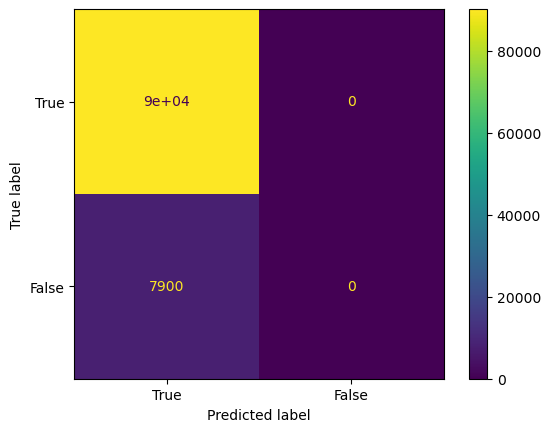

In [37]:
#creating confusion matrix chart
confusion_matrix = confusion_matrix(y, model.predict(x))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[True, False])

cm_display.plot()
plt.show()

In [38]:
print(f'The accuracy calculation is {round(model.score(x, y)*100,1)}%.')

The accuracy calculation is 91.9%.


### PART IV: ANALYSIS

#### D. Analysis<a id='d'></a>

Prior to any model reduction, my inital model had a model accuracy of 91.9%, but the model failed to converge.  For the first round of model reduction, I used variable inflaction factor to check for multicollinearity.  From this analysis, `Age_Days` was the only feature removed since it had VIF values higher than 10.  After dropping `Age_Days`, I checked VIF values again but this time all values were less than 10, so I stopped reducing my model based on VIF.

Next, I analyzed the data using the Logit Regression Results method.  I iterated the logit method and removed the independent variable with the highest p-value each time.  Here is an ordered lists of the variables, along with its p-value, I removed on each iteration:

<ul>
    <li>XNA: p-value 0.970</li>
    <li>House_Own: p-value 0.951</li>
    <li>M: p-value 0.756</li>
    <li>Active_Loan: p-value 0.350</li>
    <li>Post Grad: p-value 0.291</li>
</ul>

After removing the five independent variables above, I had my reduced model.  Based on the logistic regression score,  the reduced model's accuracy score remained the same at 91.9%, but now the model converged.  The 91.9% is confirmed in confusion matrix.

I  used `variance inflaction factor` from `statsmodels` to reduce my model.  An advantage is that it's relatively easy to run the code and reduce the features in the model.  However, a disadvantage is that it's a very manual process. I run VIF and have to look for the highest VIF to eliminate and re-run VIF.  The manual nature of this process makes it extremely easy for there to be human error.  If I erroneously eliminate a feature, this could impact the model and the analysis results.

### PART V: DATA SUMMARY AND IMPLICATIONS

#### E. Summary and Implications<a id='e'></a>

In the initial model I had 15 explanatory variables, and in the reduced model I had 9 explanatory variables. The log-likelihood of the initial model was -26728, and -27014 in the reduced model. Since the initial model has the higher log-likelihood value, this suggest that the initial model is the better fit for the data.

Both models had identical LL-Null values (-27466) and a very small LLRp-value, and similar Pseudo R-Squred values .

Both models had an accuracy score of 91.9%.

Based on the Logit Regression Results, the regression equation would be:

y = -2.6753 - 0.3032*(Car_Owned) + 0.0079*(Payment_to_Income) + 0.4899*(Graduation dropout) + 0.6799*(Junior secondary) + 0.5943*(Secondary) + 0.2244*(S) - 0.1794*(W) - 0.4890*(Male) - 0.3366*(Other).

If all else is kept constant, the coefficients indicates that:

<ul>
    <li>The ‘Car_Owned’ coefficient tells us that customers who own cars have a lower probability of default.</li>
    <li>The ‘Payment_to_Income’ coefficient tell us that customers with higher PTI have higher probability of default.</li>
    <li>The ‘Graduation dropout’ coefficient tell us that customer who dropped out have a higher probability of default.</li>
    <li>The ‘Junior secondary’ coefficient tells us that customers with the highest level of education of junior secondary have a higher probability of default.</li>
    <li>The ‘Secondary’ coefficient tells us that customers with the highest level of education of secondary have a higher probability of default.</li>
    <li>The ‘S’ coefficient tells us that customers who are single have a higher probability of default.</li>
    <li>The ‘W’ coefficient tells us that customers who are widowed have a lower probability of default.</li>
    <li>The ‘Male’ coefficient tells us that customers who identify as male have a lower probability of default.</li>
    <li>The ‘Other’ coefficient tells us that customers who identify as other have a lower probability of default.</li>
</ul>

Based on the reduced model's Pseudo R-Squared value of 0.01646, the model has very low statistical significance.  This implies that the selected explanatory variables used in the reduced regression model don't appropriately model the data.

However, the statistical insignificance doesn't imply practical triviality.  Based on the y-intercept, it doesn't make sense that before any variables are taken into account, the customer is highly unlikely to default when most of the independent variables increase default probability.  The model nonsensically applies that Payment_to_Income has the most negligible impact on the likelihood of default when it is one of the more significant predictors of default.

A limitation of this data analysis is that more information is needed.  Very few customers had loan defaults, so any model will predict that the loan will not default and most likely get it correct.  Better definitions are needed on what the data has.  For example, it's not clear if `Client_Income` is a monthly figure.

Based on the default frequency in the data, the lender appears to be risk-averse.  More data is needed on loans that default to create a model that can better predict the likelihood of default.  One direction the financial institution could pursue is adding the actual credit score to the data and creating score buckets to asses risk separately.  In the 600-640 range, perhaps the main predictor of default is PTI, but in the 700+ score range, it's the average credit age.  More granularity within buckets helps the financial institution predict defaults more accurately, which results in more accurate loss estimation and lower rates in the tiers where losses are expected to be less.

Another direction the financial institution could take is that if the data set is representative of their current lending practices, the results suggest that the financial institution can take on more risk.  More risk usually results in higher yields.  If the institution can create a model that better predicts an applicant's creditworthiness, the result would be mitigating the risk on the front end, before the loan originates, and capturing a higher yielding loan by approving and funding loans in the lower credit score space.  The result would be that the lender uses data analytics to make better decisions when the loan's risk increases.

#### F. Sources<a id='f'></a>

Meastanmay (n.d.).  <i>NBFI Vehicle Loan repayment Dataset</i>.  Kaggle.
    </br>&emsp;&emsp;Retrieved August 21, 2023 from https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset
    
Middleton, Dr. Keiona (2022). D208 - Webinar: Getting Started with D208 Part I (November 2022) [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

Middleton, Dr. Keiona (2022). D208 - Webinar: Getting Started with D208 Part II (November) [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d

Sewell, Dr. William (2017). Dr. Sewell D208_Predictive_Modeling_Webinar_Episode 1t [PowerPoint Slide 27].
    </br>&emsp;&emsp;Western Governors University. https://westerngovernorsuniversity.sharepoint.com/sites/DataScienceTeam/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=9ccodm&cid=b8189c62%2D0063%2D4435%2Db439%2D04b9108b3e81&RootFolder=%2Fsites%2FDataScienceTeam%2FShared%20Documents%2FGraduate%20Team%2FD208%2FStudent%20Facing%20Resources&FolderCTID=0x01200022092E63FD85A64A8ABFB4F5AEA4839A
    
W3Schools (Unknown). Machine Learning - Confusion Matrix.
    </br>&emsp;&emsp;Retrieved July 22, 2023, from https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=In%20order%20to%20create%20the,metrics%20from%20the%20sklearn%20module.&text=Once%20metrics%20is%20imported%20we,our%20actual%20and%20predicted%20values.&text=To%20create%20a%20more%20interpretable,into%20a%20confusion%20matrix%20display.